# Regression Models

Reversal models define the relationship between the variables by adding a line to the targeted data. Line reversal models use a straight line, while non-line reversal models use a curved line. Undoing allows you to estimate how dependent variables change as independent variables change.

# Simple Linear Regression

Simple linear regression is used to estimate the relationship between two quantitative variables. You can use simple linear regression when you want to know:

1) How strong the relationship is between two variables (e.g. the relationship between rainfall and soil erosion).

2) The value of the dependent variable at a certain value of the independent variable (e.g. the amount of soil erosion at a certain level of rainfall).

# Formula

Y = B0 + B1*X + e

1) y is the predicted value of the dependent variable (y) for any given value of the independent variable (x).

2) B0 is the intercept, the predicted value of y when the x is 0.

3) B1 is the regression coefficient – how much we expect y to change as x increases.

4) x is the independent variable ( the variable we expect is influencing y).

5) e is the error of the estimate, or how much variation there is in our estimate of the regression coefficient.

Predicted Y Value:
  [40835.10590871474, 123079.39940819163, 65134.556260832906, 63265.36777220843, 115602.64545369372, 108125.89149919583, 116537.23969800597, 64199.96201652067, 76349.68719257976, 100649.13754469794]


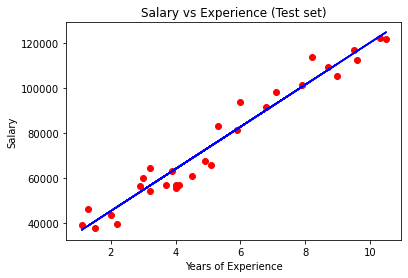

Mean Squared Error: 21026037.33


In [12]:
# Simple Linear Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error

# Importing the dataset
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)
print("Predicted Y Value:\n ",list(y_pred))

# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')


# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

#model evaluation
#mean squared error
print("Mean Squared Error: %.2f"%mean_squared_error(y_test,y_pred))

# Multiple Linear Regression

Multi-linear regression (MLR), also known as multiple regression, is a mathematical method that uses a few descriptive variables to predict the outcome of a variable variance.

Multiple regression is an extension of linear regression (OLS) that uses a single descriptive variant.

MLR is widely used in econometrics and finance.

# Formula

Y = B0 + B1*X1 + B2*X2 + ...... + Bi*Xi

In [14]:
import numpy as np 
import pandas as pd
from sklearn import linear_model

df = pd.read_csv('homeprices.csv')

In [15]:
df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [16]:
import math
median_bedroom = math.floor(df.bedrooms.median())

In [17]:
median_bedroom

4

In [18]:
df.bedrooms = df.bedrooms.fillna(median_bedroom)

In [19]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [20]:
reg = linear_model.LinearRegression()
reg.fit(df[['area' , 'bedrooms' , 'age']] , df.price)

LinearRegression()

In [21]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [22]:
reg.intercept_

221323.00186540425

In [23]:
reg.predict([[3000 , 3 , 40]])

array([498408.25158031])

In [24]:
 y = 112.06244194 * 3000 + 23388.88007794 * 3 + (-3231.71790863) * 40 +221323.00186540396


In [25]:
y

498408.251574024

# Logistic Regression

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

In [26]:
import numpy as np 
import pandas as pd
dataset= pd.read_csv('insurance_data.csv')
dataset.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


Check outliers for zero and null values in age column of dataset

In [27]:
dataset.age.isnull().sum()

0

There are zero entries with null value in age column already so we don't need to handle them.
We will plot the graph of the dataset now.

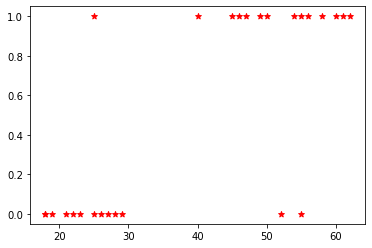

In [30]:
from matplotlib import pyplot as plt
plt.scatter(dataset.age, dataset.bought_insurance, marker= '*', color='red')

The markers on 0.0 value on y axis shows the age of people who didn't buy the insurance and on 1.0 value on y axis shows the age of people who bought the insurence

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(dataset[['age']], dataset.bought_insurance, random_state=20, test_size=0.3)

In [32]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [33]:
model.score(x_test, y_test)

1.0

We are getting accuracy of 1.0 because of low dataset, now I will predict the model but before that let's see the test data.  


In [34]:
x_test[:10]

,age
13,29
4,46
1,25
10,18
26,23
12,27
18,19
25,54
23,45


In [35]:
model.predict(x_test[:10])

array([0, 1, 0, 0, 0, 0, 0, 1, 1])

You can observe that our model is predicting correct value as higher aged person tends to buy the insurance and low aged person don't.
Let's check the probability also of buying an insurance and not buying the insurance.

In [36]:
model.predict_proba(x_test)

array([[0.70120346, 0.29879654],
       [0.30192858, 0.69807142],
       [0.77746542, 0.22253458],
       [0.87515403, 0.12484597],
       [0.80998572, 0.19001428],
       [0.74115799, 0.25884201],
       [0.86387315, 0.13612685],
       [0.16328672, 0.83671328],
       [0.3232993 , 0.6767007 ]])

Let's understand above output with first row as an example now, [0.70120346, 0.29879654] means that there are 70% probability that he will not buy the insurance and 29% is the probability that he will buy the insurance.